## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image

checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device="cuda")
size = 224

fatal: destination path 'ProtoPNet' already exists and is not an empty directory.


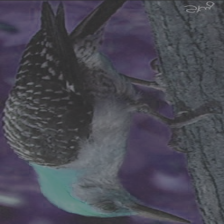

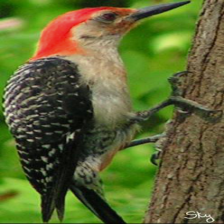

In [2]:
transform = tfs.Compose([
    tfs.Resize(size=(size, size)),
    tfs.ToTensor()])

image = Image.open("data/train_cropped/189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg")
image = transform(image)


robustness_transforms = [
    ReversibleRandomRotate90(p=0.5), 
    ReversibleRandomHorizontalFlip(p=0.5), 
    ReversibleRandomVerticalFlip(p=0.5),
    ReversibleRandomColorJitter(1, 0.1, [0.1, 0.5], [0.1, 0.5], [0.1, 0.5])
]

t = ReversibleCompose(robustness_transforms)

image_t = t(image)
display(tfs.ToPILImage()(image_t))
image = t.reverse_transform(image_t)
display(tfs.ToPILImage()(image))

In [3]:
input_tensor = torch.rand((3, size, size))

transforms = [ClampingMinMax(0, 1)]
parametrization_transforms = [NormalizationMeanStd()]
denormalization_transforms = [DenormalizationMeanStd()]

## Reversible robustness transformations

step: 0/500, loss: 10.601545333862305
step: 100/500, loss: 0.5676233172416687
step: 200/500, loss: 0.5185326337814331
step: 300/500, loss: 0.7358383536338806
step: 400/500, loss: 1.8801383972167969


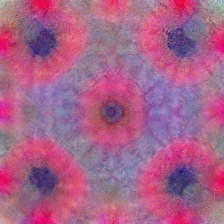

In [6]:
ptypes = [(188,1)]

robustness_transforms = [
    tfs.GaussianBlur(7, 2),
    ReversibleRandomRotate90(p=0.5), 
    ReversibleRandomHorizontalFlip(p=0.5), 
    ReversibleRandomVerticalFlip(p=0.5),
    ReversibleRandomColorJitter(p=0.5, brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)
]

image = visualize_prototypes(model, 
                             ptypes,
                            optimization_steps=500, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            optimizer_kwargs={'lr': 0.2}, 
                            print_interval=100,
                            display_interval=None)

pilimg = tfs.ToPILImage()(image)
display(pilimg)

## Octaves with reversible robusness transformations

step: 0/500, loss: 8.582626342773438
step: 100/500, loss: 4.73065185546875
step: 200/500, loss: 4.801025390625
step: 300/500, loss: 3.5564727783203125
step: 400/500, loss: 4.6038970947265625
step: 0/500, loss: 4.093414306640625
step: 100/500, loss: 3.57891845703125
step: 200/500, loss: 3.83148193359375
step: 300/500, loss: 3.873626708984375
step: 400/500, loss: 4.15374755859375
step: 0/500, loss: 4.777191162109375
step: 100/500, loss: 4.5545196533203125
step: 200/500, loss: 2.8462066650390625
step: 300/500, loss: 3.3892974853515625
step: 400/500, loss: 3.267730712890625
step: 0/500, loss: 4.00006103515625
step: 100/500, loss: 2.77447509765625
step: 200/500, loss: 2.87115478515625
step: 300/500, loss: 3.3865814208984375
step: 400/500, loss: 2.6944580078125
step: 0/500, loss: 1.6002998352050781
step: 100/500, loss: 0.9277915954589844
step: 200/500, loss: 1.7164497375488281
step: 300/500, loss: 1.3790359497070312
step: 400/500, loss: 1.7010345458984375
step: 0/500, loss: 6.656478881835937

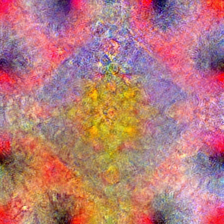

In [7]:
robustness_transforms = [
    tfs.GaussianBlur(7, 2),
    ReversibleRandomRotate90(p=0.5), 
    ReversibleRandomHorizontalFlip(p=0.5), 
    ReversibleRandomVerticalFlip(p=0.5),
    ReversibleRandomColorJitter(p=0.5, brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)
]

image = visualize_prototypes_octaves(model, 
                             ptypes,
                            optimization_steps=500, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            optimizer_kwargs={'lr': 0.2}, 
                            print_interval=100,
                            display_interval=None)

pilimg = tfs.ToPILImage()(image)
display(pilimg)